In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [11]:
df = pd.read_csv(r"C:\Users\rahul\Desktop\projects\spam.csv", encoding='latin-1')

# Droping unnecessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Converting labels to binary (0 = ham, 1 = spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nLabel Distribution:")
print(df['label'].value_counts())

Dataset Preview:
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None

Label Distribution:
label
0    4825
1     747
Name: count, dtype: int64


In [12]:
vectorizer = CountVectorizer(stop_words='english')  # Remove common English stopwords

X = vectorizer.fit_transform(df['text'])
y = df['label']

print("Feature Matrix Shape:", X.shape)
print("Sample Feature Names:", vectorizer.get_feature_names_out()[:10])

Feature Matrix Shape: (5572, 8404)
Sample Feature Names: ['00' '000' '000pes' '008704050406' '0089' '0121' '01223585236'
 '01223585334' '0125698789' '02']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (4457, 8404)
Testing set size: (1115, 8404)


In [14]:
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


In [21]:
y_pred = nb_classifier.predict(X_test)

print("Predicted labels (sample):", y_pred[:10])
print("Actual labels (sample):   ", y_test.values[:10])

Predicted labels (sample): [0 0 1 0 1 0 0 0 0 0]
Actual labels (sample):    [0 0 1 0 1 0 0 0 0 0]


Accuracy: 0.9802690582959641
Confusion Matrix:
[[954  11]
 [ 11 139]]
Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       965
        Spam       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



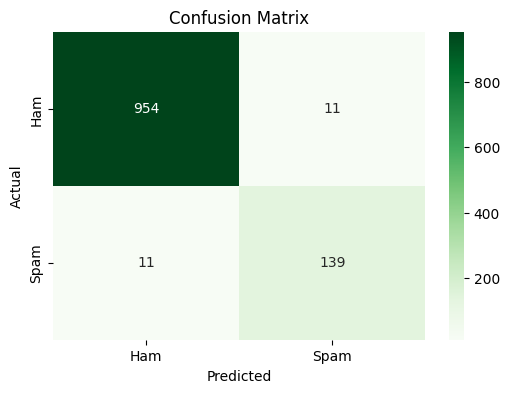

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# New messages to classify
new_messages = [
    'Free entry in 2 a weekly comp to win alot of money now!',
    'Hey, can we  still have a meeting at 3pm today?',
    'Win Free Money!',
    'callback soon'
]

new_X = vectorizer.transform(new_messages)


new_predictions = nb_classifier.predict(new_X)
print("New message predictions (0 = ham, 1 = spam):", new_predictions)

New message predictions (0 = ham, 1 = spam): [1 0 1 0]
